In [1]:
from Code.utils import data_loader, figures, audio_extraction

In [2]:
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
loader = data_loader(path="./dataset/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE)
dataset = loader.getData()
dataset.head()

,Path,Emotions
0,./dataset/1001_DFA_ANG_XX.wav,angry
1,./dataset/1001_DFA_DIS_XX.wav,disgust
2,./dataset/1001_DFA_FEA_XX.wav,fear
3,./dataset/1001_DFA_HAP_XX.wav,happy
4,./dataset/1001_DFA_NEU_XX.wav,neutral


In [3]:
print(f"There are {len(loader)} samples in the dataset")
# idx = 1
signal, label, sr = loader[3]
print(signal, label, sr)

There are 7442 samples in the dataset
tensor([[[9.3112e-02, 1.0073e-02, 2.2695e-03,  ..., 3.0538e-03,
          7.4623e-03, 1.3181e+00],
         [3.4533e-01, 2.9652e-01, 1.7602e-02,  ..., 1.2521e-02,
          1.4655e-02, 2.6835e+00],
         [5.5388e-01, 8.5805e-01, 1.3356e-01,  ..., 1.6773e-01,
          2.6913e-01, 5.0070e+00],
         ...,
         [6.3343e-05, 4.6565e-06, 2.6354e-06,  ..., 7.6054e-04,
          2.6324e-04, 5.3497e-04],
         [1.8688e-05, 1.6666e-07, 6.4764e-08,  ..., 7.2620e-05,
          3.5408e-05, 3.6846e-04],
         [1.8934e-05, 4.1795e-08, 2.5252e-08,  ..., 1.9504e-05,
          2.2961e-06, 3.9761e-04]]]) happy 16000


In [4]:
dataset["Emotions"].value_counts()

angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64

# Exploritory Data Analysis

<AxesSubplot: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

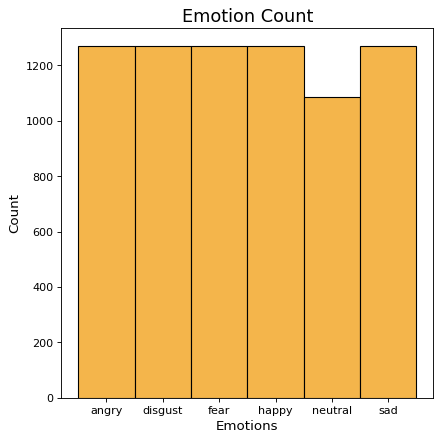

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')

This is a recording of ./dataset/1001_IEO_DIS_LO.wav from index 10 of disgust emotion from the dataset


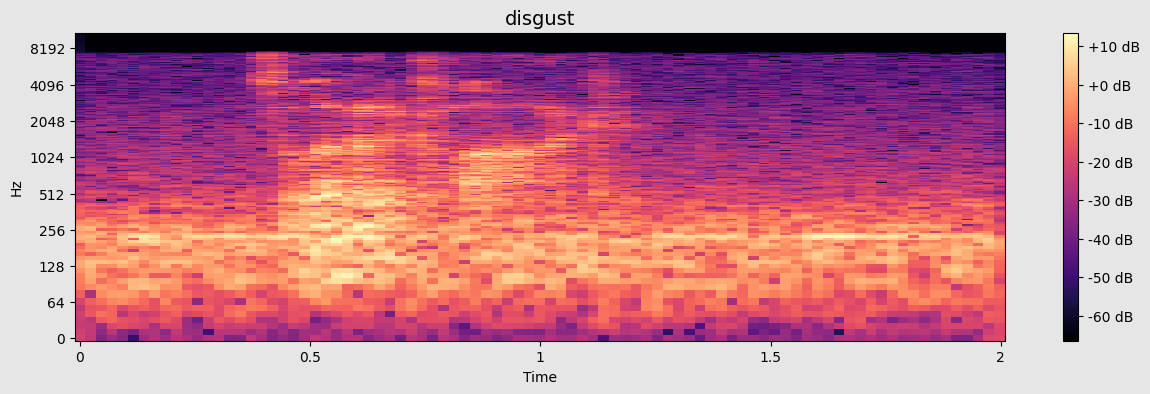

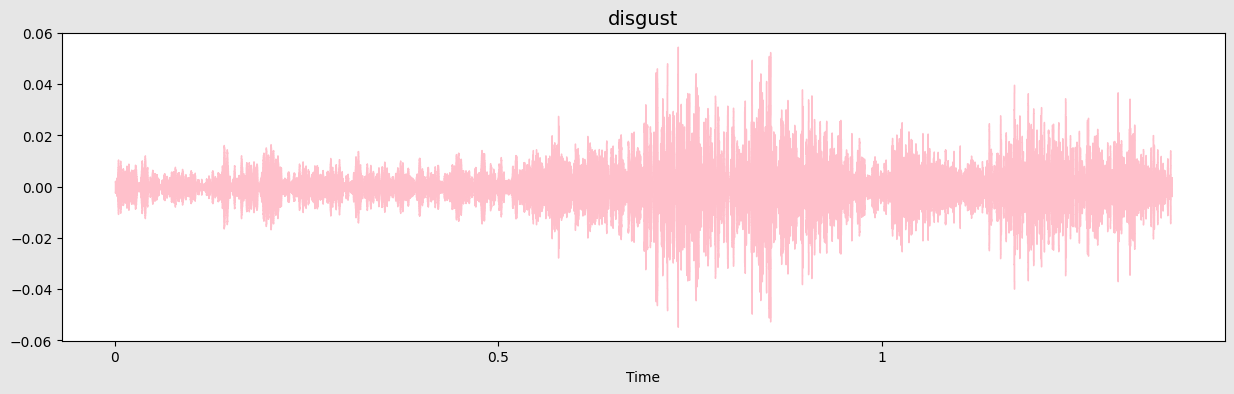

In [5]:
idx = 10
loader.spectogram(idx, "log")
loader.waveplot(idx)

# Feature Extraction

In [7]:
file = dataset["Path"][:2]
print(file)
X_mfcc = file.apply(lambda x: audio_extraction.mfcc_formula(x))
X_mfcc

0    ./dataset/1001_DFA_ANG_XX.wav
1    ./dataset/1001_DFA_DIS_XX.wav
Name: Path, dtype: object


0    [-493.19052, 130.57959, -15.17191, 47.93188, -...
1    [-533.95325, 136.55078, -23.712204, 57.03613, ...
Name: Path, dtype: object

In [1]:
from Code.utils import data_loader, figures, audio_extraction
X_mfcc = audio_extraction("./dataset/").extract_audio()
X_mfcc

,0,1,2,3,4,5,6,7,8,9,10,11,12,Emotions
0,-493.190521,130.579590,-15.171910,47.931881,-2.633088,17.580477,-22.392756,-7.491928,-10.839611,-5.190917,-9.134110,-3.396870,2.244876,angry
1,-533.953247,136.550781,-23.712204,57.036129,2.207755,23.590717,-24.639025,3.642645,-11.085177,-6.580270,-4.861051,-5.963374,5.484548,disgust
2,-480.136627,111.516022,-8.318337,35.844154,5.748573,10.552864,-19.095610,-3.668406,-7.424833,-7.283167,-10.904288,-5.082917,0.080815,fear
3,-504.650818,122.550156,-15.159066,45.422527,7.672544,13.340709,-25.357574,-2.860527,-7.579400,-9.865721,-12.854387,-5.120391,0.348238,happy
4,-533.270813,128.219086,-6.071215,42.160110,10.969781,13.633672,-14.749569,-5.942591,-9.058737,-7.911500,-7.507226,-2.613515,0.558189,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,-617.730042,134.337433,10.402402,54.559120,-14.122120,40.434372,-16.255671,8.739514,-8.622474,2.713698,1.193010,-11.110655,6.110638,disgust
7438,-619.640259,128.407333,8.628220,64.150795,-14.054352,45.616741,-18.352726,8.310579,-5.797090,2.402461,-2.037600,-12.133834,5.760205,fear
7439,-549.675659,129.427277,-0.508095,57.266365,-16.252283,28.453440,-23.715984,5.575493,-11.502940,3.809773,-2.094521,-10.209229,8.525149,happy
7440,-575.136841,127.776810,13.419468,46.244183,-18.300213,30.528986,-12.969846,4.706892,-8.582385,4.726083,-0.939862,-9.744591,4.713840,neutral


# SVM Model

In [5]:
from Code.utils import load_model,data_loader

# dataset = data_loader('./dataset/').getData()
# # {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
# paths = dataset["Path"].to_numpy()
# paths = paths[30:40]
# for x in paths:
#     emotions = x.split("_")
#     print(emotions[2])
#     print(load_model(x, 'svm_model.sav').getModelPrediction())
load_model('./dataset/1001_DFA_HAP_XX.wav', 'svm_model.sav').getModelPrediction()

{'angry': 0.07433871932266392,
 'fear': 0.2785537081268823,
 'disgust': 0.08251603965116137,
 'happy': 0.5252939862815649,
 'neutral': 0.0271602464012859,
 'sad': 0.012137300216441826}

# CNN Model

In [18]:
import torch
from torch import nn
from torch.utils.data import Dataset
import torchaudio

In [48]:
import os
from os import listdir
import pandas as pd

class data_loader:
    def __init__(self, path: str):
        self.path = path
    def getData(self):
        if os.path.isdir(self.path):
            audio_path = []
            audio_emotion = []
            directory_path = listdir(self.path)

            for audio in directory_path:
                audio_path.append(self.path+audio)
                emotion = audio.split("_")

                if emotion[2] == "ANG":
                    audio_emotion.append("angry")
                elif emotion[2] == "FEA":
                    audio_emotion.append("fear")
                elif emotion[2] == "DIS":
                    audio_emotion.append("disgust")
                elif emotion[2] == "HAP":
                    audio_emotion.append("happy")
                elif emotion[2] == "NEU":
                    audio_emotion.append("neutral")
                elif emotion[2] == "SAD":
                    audio_emotion.append("sad")

            emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
            audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
            dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
            return dataset
        elif os.path.isfile(self.path):
            audio_emotion = []
            audio_path = [self.path]
            emotion = self.path.split("_")

            if emotion[2] == "ANG":
                audio_emotion.append("angry")
            elif emotion[2] == "FEA":
                audio_emotion.append("fear")
            elif emotion[2] == "DIS":
                audio_emotion.append("disgust")
            elif emotion[2] == "HAP":
                audio_emotion.append("happy")
            elif emotion[2] == "NEU":
                audio_emotion.append("neutral")
            elif emotion[2] == "SAD":
                audio_emotion.append("sad")

            emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
            audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
            dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
            return dataset
        else:
            return("Wrong Path File")

    def __len__(self):
        return len(self.getData())

    def __getitem__(self, index):
        audio_path = f"{self.getData().Path[index]}"
        label = f"{self.getData().Emotions[index]}"
        signal, sr = torchaudio.load(audio_path)
        return signal,label

In [62]:
data = data_loader("./dataset/")
print(f"There are {data.__len__()} samples in the dataset")
signal, label = data[3]

There are 7442 samples in the dataset


'happy'

In [19]:
signal, sr = torchaudio.load("./dataset/1001_DFA_ANG_XX.wav")

In [58]:
signal

tensor([[-0.0043, -0.0033, -0.0030,  ..., -0.0001, -0.0002, -0.0002]])

In [21]:
sr

16000